In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df_import = pd.read_csv('adult.csv')
df_import.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [70]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [77]:
df_import['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [72]:
df_import.groupby('education')['income'].value_counts()

education     income
10th          <=50K      1302
              >50K         87
11th          <=50K      1720
              >50K         92
12th          <=50K       609
              >50K         48
1st-4th       <=50K       239
              >50K          8
5th-6th       <=50K       482
              >50K         27
7th-8th       <=50K       893
              >50K         62
9th           <=50K       715
              >50K         41
Assoc-acdm    <=50K      1188
              >50K        413
Assoc-voc     <=50K      1539
              >50K        522
Bachelors     <=50K      4712
              >50K       3313
Doctorate     >50K        431
              <=50K       163
HS-grad       <=50K     13281
              >50K       2503
Masters       >50K       1459
              <=50K      1198
Preschool     <=50K        82
              >50K          1
Prof-school   >50K        617
              <=50K       217
Some-college  <=50K      8815
              >50K       2063
Name: count, dtype:

In [73]:
df_import['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [78]:
ed_sub = ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-acdm', '10th']

ed_sub_df = df_import[df_import['education'].isin(ed_sub)]
ed_sub_df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-acdm       1601
10th             1389
Name: count, dtype: int64

In [234]:
test = pd.DataFrame(ed_sub_df.groupby(['education', 'income'])['income'].value_counts())
test

count
education    income       
10th         <=50K    1302
             >50K       87
Assoc-acdm   <=50K    1188
             >50K      413
Bachelors    <=50K    4712
             >50K     3313
HS-grad      <=50K   13281
             >50K     2503
Masters      <=50K    1198
             >50K     1459
Some-college <=50K    8815
             >50K     2063

In [239]:
test1 = test.unstack(1)
test1['count']['<=50K']
print(test1)

df_percent = test1.div(test1.sum(axis=1), axis=0) * 100
df_percent

              count      
income        <=50K  >50K
education                
10th           1302    87
Assoc-acdm     1188   413
Bachelors      4712  3313
HS-grad       13281  2503
Masters        1198  1459
Some-college   8815  2063


count           
income            <=50K       >50K
education                         
10th          93.736501   6.263499
Assoc-acdm    74.203623  25.796377
Bachelors     58.716511  41.283489
HS-grad       84.142169  15.857831
Masters       45.088446  54.911554
Some-college  81.035117  18.964883

In [236]:
x = np.arange(len(test1))
width = .35
print(x)

[0 1 2 3 4 5]


The Graph Below depicts the distribution of Income by Education level based on the top 6 levels.
Notice how it can appear that HS-grad level produces a high amount of higher income while the Masters level shows a relatively small number of people making the higher income.

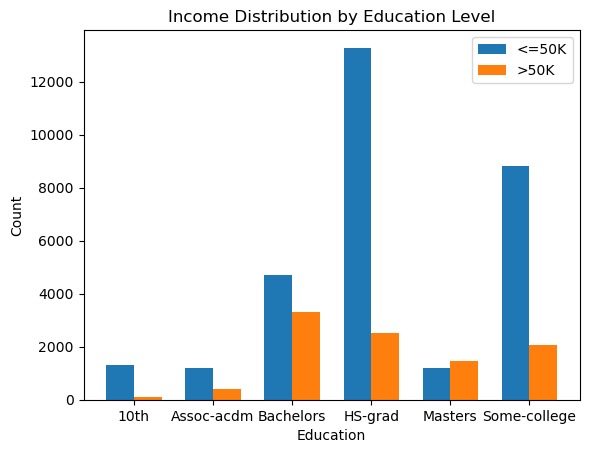

In [237]:
fig, ax = plt.subplots()

bars1 = ax.bar(x - width/2, test1['count']['<=50K'], width, label='<=50K')
bars2 = ax.bar(x + width/2, test1['count']['>50K'], width, label='>50K')


ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Income Distribution by Education Level')
ax.set_xticks(x)
ax.set_xticklabels(test1.index)
ax.legend()
plt.show()

As opposed to looking at number of participants in each bracket of income, lets check the ratio of people in higher class vs. lower.

It is clear that a HS-grad level candidate is much more likely to land in the lower bracket.  In contrast, a Masters education shows a slightly higher chance of making more than 50K.

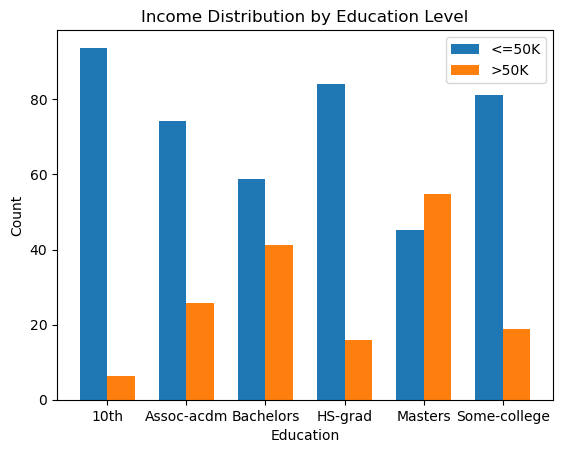

In [240]:
fig, ax = plt.subplots()

bars1 = ax.bar(x - width/2, df_percent['count']['<=50K'], width, label='<=50K')
bars2 = ax.bar(x + width/2, df_percent['count']['>50K'], width, label='>50K')


ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Income Distribution by Education Level')
ax.set_xticks(x)
ax.set_xticklabels(df_percent.index)
ax.legend()
plt.show()

In [241]:
df_import.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [244]:
df_import['capital-gain'].value_counts()

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040        1
1639         1
2387         1
Name: count, Length: 123, dtype: int64

In [249]:
df_cap_gains = df_import[df_import['capital-gain'] == 99999]
df_cap_gains['gender'].value_counts()

gender
Male      208
Female     36
Name: count, dtype: int64

In [254]:
sub_df_cap_gains = df_cap_gains[['gender', 'hours-per-week', 'income']]
sub_df_cap_gains

,gender,hours-per-week,income
83,Male,50,>50K
346,Female,40,>50K
357,Male,80,>50K
418,Male,40,>50K
692,Male,55,>50K
...,...,...,...
48109,Male,55,>50K
48253,Male,40,>50K
48371,Male,55,>50K
48519,Male,40,>50K


In [266]:
sub_df_cap_gains['hours-per-week'].value_counts()

hours-per-week
40    66
50    47
60    37
55    18
45    11
70    11
65     9
80     8
35     8
30     5
37     3
75     3
48     3
20     3
36     2
56     1
43     1
57     1
72     1
99     1
84     1
42     1
54     1
52     1
25     1
Name: count, dtype: int64

In [260]:
males_hours = sub_df_cap_gains[sub_df_cap_gains['gender'] == 'Male']['hours-per-week']
females_hours = sub_df_cap_gains[sub_df_cap_gains['gender'] == 'Female']['hours-per-week']

In [301]:
male_hours_df = pd.DataFrame(males_hours)
male_hours_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 83 to 48799
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   hours-per-week  208 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [311]:
pd.DataFrame(male_hours_df.groupby('hours-per-week').value_counts().sort_values())
# pd.DataFrame(male_hours_df.value_counts().sort_values())

,count
hours-per-week,
52,1
72,1
56,1
54,1
84,1
43,1
99,1
37,1
42,1


In [312]:
mapper = {52:50, 72:70,56:55, 54:55,84:85,43:45,99:80,37:35,42:40,48:50}
male_hours_df['hours-per-week'] = male_hours_df['hours-per-week'].replace(mapper)

pd.DataFrame(male_hours_df.value_counts().sort_values())

,count
hours-per-week,
85,1
20,2
30,3
75,3
35,5
65,9
80,9
45,11
70,12


10843

(array([ 1.,  1.,  0.,  2.,  0.,  4.,  4., 16.,  0.,  1.,  0.,  2.,  0.,
         1.,  4.]),
 array([20.        , 22.66666667, 25.33333333, 28.        , 30.66666667,
        33.33333333, 36.        , 38.66666667, 41.33333333, 44.        ,
        46.66666667, 49.33333333, 52.        , 54.66666667, 57.33333333,
        60.        ]),
 [<matplotlib.patches.Polygon at 0x3469fad50>])

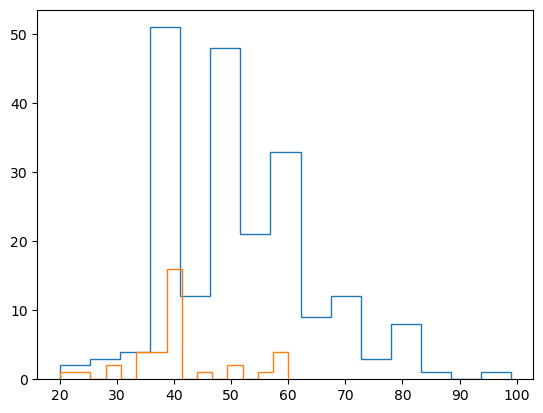

In [261]:
plt.hist(males_hours, bins=15, histtype='step')
plt.hist(females_hours, bins=15, histtype='step')

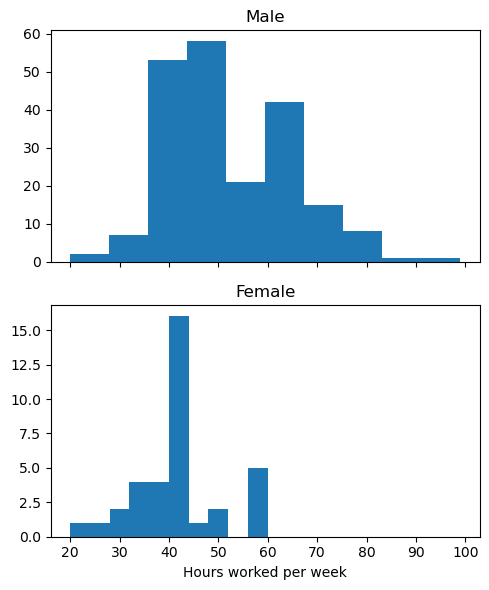

In [325]:
fig, (ax, ax2) = plt.subplots(2,1, figsize=(5,6), sharex=True)
ax.hist(males_hours, bins=10)
ax.set_title('Male')
ax2.hist(females_hours, bins=10)
ax2.set_title('Female')
ax2.set_xlabel('Hours worked per week')
plt.tight_layout()
plt.show()
